## Amazon Prime Analysis.

Task : Simple Eplanatory Data Analysis. |
Engine: Vs studio Code-Jupyter notebook |
Dataset: Amazon prime-Kaggle |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loaded variable 'df' from URI: c:\Users\HP\Desktop\python ds\Projects\amazon_prime_titles.csv
df = pd.read_csv(r'c:\\Users\\HP\\Desktop\\python ds\\Projects\\amazon_prime_titles.csv')

df.head().tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [2]:
# Get all information in one shot
print("Dataframe shape:", df.shape)
print("Data types:")
print(df.dtypes)
print("\nUnique values in 'director' column:")
print(df["director"].unique())
print("\nNumber of unique entries in each column:")
print(df.nunique())
print("\nSummary statistics:")
print(df.describe(include='all'))  # Include all data types for describe

# Drop duplicates and specific column
print("\nDataframe after dropping duplicates:")
df.drop_duplicates(inplace=True)  # Modifies df directly
print(df.shape)

print("\nDataframe after dropping 'date_added' column:")
df.drop(columns=['date_added'], inplace=True)  # Modifies df directly
print(df.shape)


Dataframe shape: (9668, 12)
Data types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Unique values in 'director' column:
['Don McKellar' 'Girish Joshi' 'Josh Webber' ...
 'John-Paul Davidson, Stephen Warbeck' 'Emily Skye' 'Steve Barker']

Number of unique entries in each column:
show_id         9668
type               2
title           9668
director        5773
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

Summary statistics:
       show_id   type                title     director            cast  \
count     9668   9668                 9668         7585            8435   
unique    9668      2                 

#Checking for null values and presenting it in a heatmap


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

By visualizing null values in a heatmap, you can quickly identify features with high missing value rates and understand their distribution across your data.


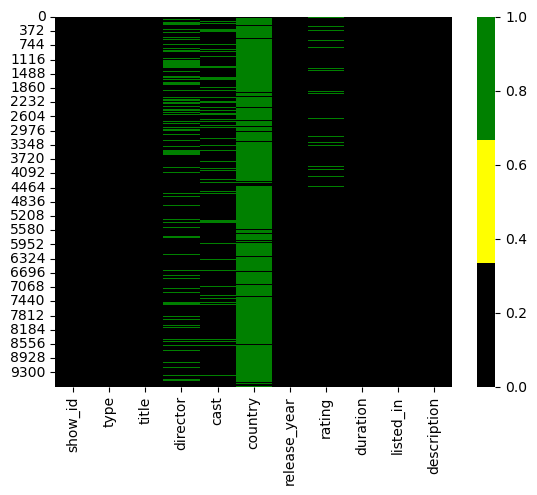

In [4]:
cmap = ["black", "yellow", "green"]
sns.heatmap(df.isnull(),cmap=cmap)
plt.show()

Rating the highest number of Movies and Tv shows yearly released


In [5]:
df['release_year'].value_counts()

release_year
2021    1442
2020     962
2019     929
2018     623
2017     562
        ... 
1922       2
1926       2
1924       1
1923       1
1927       1
Name: count, Length: 100, dtype: int64

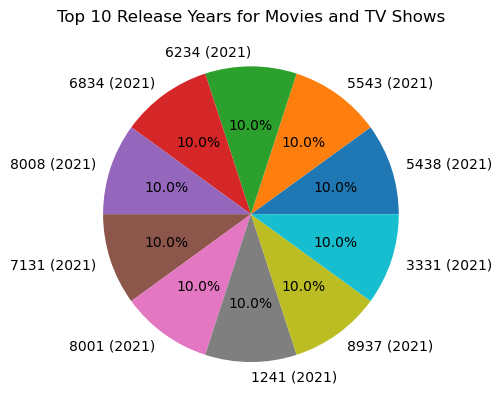

In [6]:

# Sort the Series by count in descending order (highest first)
release_year= df['release_year'].sort_values(ascending=False)

# Select the top 10 most frequent years (or adjust as needed)
top_10_years=release_year.head(10)

# Create labels with release years and counts (combine year and count)
labels = [f"{year} ({count})" for year, count in zip(top_10_years.index, top_10_years.to_numpy())]

# Extract counts for the pie chart
counts = top_10_years.to_numpy()

# Create the pie chart
plt.pie(counts, labels=labels, autopct="%1.1f%%")  # Display percentage with one decimal place
plt.title("Top 10 Release Years for Movies and TV Shows")
plt.show()


Number of Movies and Tv Series


In [7]:
# Check if there are multiple unique values (boolean)
has_multiple_types = df['type'].nunique() > 1

# Get the number of unique values (integer)
num_unique_types = df['type'].nunique()

print(has_multiple_types)  # True if multiple unique values, False otherwise
print(num_unique_types)     # Number of unique values


True
2


Release year Trend


In [8]:
# Grouping the data by "type" and "release_year"
release_year_by_type = df.groupby(['type', 'release_year'])['release_year'].count().unstack()
print(release_year_by_type)


release_year  1920  1922  1923  1924  1925  1926  1927  1929  1930  1931  ...  \
type                                                                      ...   
Movie          3.0   2.0   1.0   1.0   8.0   2.0   1.0   4.0   5.0   3.0  ...   
TV Show        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

release_year   2012   2013   2014   2015   2016   2017   2018   2019   2020  \
type                                                                          
Movie         197.0  227.0  295.0  282.0  402.0  404.0  438.0  730.0  736.0   
TV Show        55.0   62.0   96.0   96.0  119.0  158.0  185.0  199.0  226.0   

release_year    2021  
type                  
Movie         1139.0  
TV Show        303.0  

[2 rows x 100 columns]


In [9]:
# Filter rows with release years for both Movie and TV Show (no NaN)
filtered_df = df.dropna(subset=['release_year'])  # Drops rows with NaN in 'release_year'
# Grouping the data by "type" and "release_year"
release_year_by_type = df.groupby(['type', 'release_year'])['release_year'].count().unstack()
print(release_year_by_type)

release_year  1920  1922  1923  1924  1925  1926  1927  1929  1930  1931  ...  \
type                                                                      ...   
Movie          3.0   2.0   1.0   1.0   8.0   2.0   1.0   4.0   5.0   3.0  ...   
TV Show        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

release_year   2012   2013   2014   2015   2016   2017   2018   2019   2020  \
type                                                                          
Movie         197.0  227.0  295.0  282.0  402.0  404.0  438.0  730.0  736.0   
TV Show        55.0   62.0   96.0   96.0  119.0  158.0  185.0  199.0  226.0   

release_year    2021  
type                  
Movie         1139.0  
TV Show        303.0  

[2 rows x 100 columns]


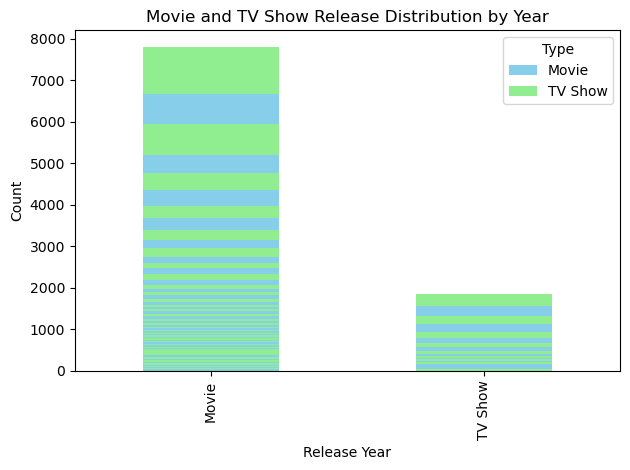

In [10]:
# Select a color scheme for Movie and TV Show counts (replace with desired colors)
Movie_color = 'skyblue'
Tv_Show_color = 'lightgreen'

# Create the stacked bar chart
release_year_by_type.plot(kind='bar', stacked=True, color=[Movie_color, Tv_Show_color])
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Movie and TV Show Release Distribution by Year")
plt.legend(title="Type", labels=["Movie", "TV Show"])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability with many years

# Display the chart
plt.tight_layout()
plt.show()

In [11]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
grouped_data = df.groupby('type').describe()
print(grouped_data)


        release_year                                                          \
               count         mean        std     min     25%     50%     75%   
type                                                                           
Movie         7814.0  2006.869977  20.263072  1920.0  2004.0  2015.0  2019.0   
TV Show       1854.0  2014.545307   9.440291  1932.0  2013.0  2017.0  2020.0   

                 
            max  
type             
Movie    2021.0  
TV Show  2021.0  


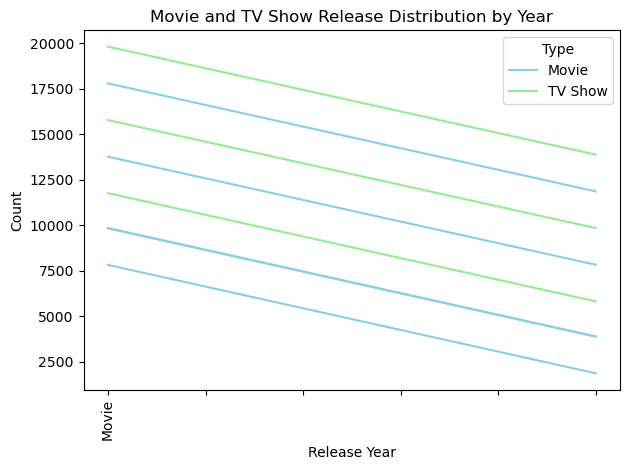

In [13]:
# Select a color scheme for Movie and TV Show counts (replace with desired colors)
Movie_color = 'skyblue'
Tv_Show_color = 'lightgreen'

# Create the stacked bar chart
grouped_data.plot(kind='line', stacked=True, color=[Movie_color, Tv_Show_color])
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Movie and TV Show Release Distribution by Year")
plt.legend(title="Type", labels=["Movie", "TV Show"])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability with many years

# Display the chart
plt.tight_layout()
plt.show()

In [14]:
type_counts = df['type'].value_counts().sum()
print(type_counts)

9668


In [15]:
df.type.value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

<Axes: xlabel='type'>

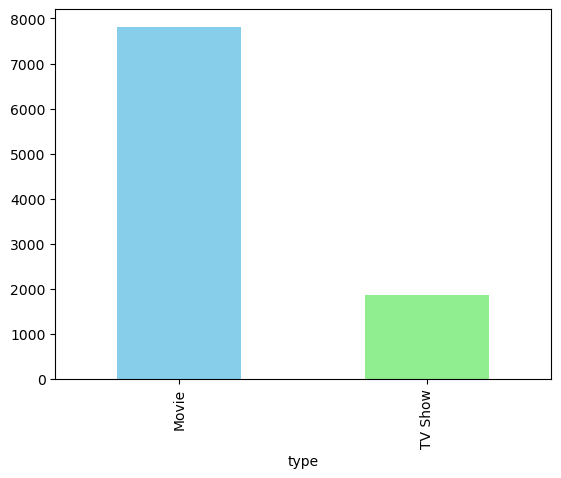

In [16]:
Movie_color = 'skyblue'
Tv_Show_color = 'lightgreen'
df.type.value_counts().plot(kind="bar",color=[Movie_color, Tv_Show_color])


# Classifying based on country


In [17]:
df[(df["type"]=="tv show")&(df["country"]=="United Kingdom")].sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: object

In [18]:
df[(df["type"]=="movie")&(df["country"]=="United Kingdom")].sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: object

In [19]:
df["country"].value_counts().head()

country
United States                    253
India                            229
United Kingdom                    28
Canada                            16
United Kingdom, United States     12
Name: count, dtype: int64

In [20]:
df[(df["type"]=="Movie")&(df["country"]=="United Kingdom")].head(10)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
14,s15,Movie,Elon Musk: The Real Life Iron Man,Sonia Anderson,"Elon Musk, Per Wimmer, Julie Anderson-Ankenbra...",United Kingdom,2018,NaN,74 min,Documentary,"Discover the meteoric rise of Elon Musk, the m..."
374,s375,Movie,The Zombie King,Aidan Belizaire,"Edward Furlong, Corey Feldman, George McCluskey",United Kingdom,2013,16+,96 min,"Comedy, Horror",After heartbroken widower Samuel makes a deal ...
656,s657,Movie,The Flaw,David Sington,"Andrew Luan, Robert Shiller, Louis Hyman",United Kingdom,2011,13+,81 min,Special Interest,The definitive doc on the 2008 financial crash...
892,s893,Movie,Stick Man,"Jeroen Jaspaert, Daniel Snaddon","Martin Freeman, Jennifer Saunders, Russell Tov...",United Kingdom,2015,ALL,27 min,"Adventure, Animation, Kids",A half-hour animation based on the much-loved ...
2095,s2096,Movie,Instant Death,Ara Paiaya,Lou Ferrigno,United Kingdom,2017,18+,84 min,Action,A gang war for drug dominance draws in a distu...
2364,s2365,Movie,Get Duked!,Ninian Doff,"Eddie Izzard, Kate Dickie, James Cosmo, Samuel...",United Kingdom,2020,16+,87 min,"Adventure, Comedy","Get Duked is an anarchic, hip-hop inspired com..."
2381,s2382,Movie,Gascoigne,Jane Preston,"Paul Gascoigne, Vinnie Jones, Gary Lineker, Jo...",United Kingdom,2015,16+,87 min,Documentary,Celebrating the life and achievements of natur...
2534,s2535,Movie,Everybody's Game,Beno Obano,"Maro Itoje, Beno Obano, Anthony Watson, Ellis ...",United Kingdom,2020,16+,53 min,Documentary,Coming from the most unlikely of rugby playing...


## Director Count.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loaded variable 'df' from URI: c:\Users\HP\Desktop\python ds\Projects\amazon_prime_titles.csv
df = pd.read_csv(r'c:\\Users\\HP\\Desktop\\python ds\\Projects\\amazon_prime_titles.csv')

In [22]:
df["director"].value_counts()

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
                        ... 
Karyn Kusama               1
K. Subash                  1
Robert Cuffley             1
J. Sabarish                1
Steve Barker               1
Name: count, Length: 5773, dtype: int64

Looking into director 'Cannis Holder' releases


In [23]:
df[(df["type"]=="Movie")&(df["director"]=="Cannis Holder")].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
76,s77,Movie,Wonderful Nursery Rhymes with Mia - Little Bab...,Cannis Holder,NaN,NaN,NaN,2019,ALL,33 min,Kids,LittleBabyBum is proud to present a compilatio...
77,s78,Movie,Wonderful Nursery Rhymes with Jacus - By Littl...,Cannis Holder,NaN,NaN,NaN,2019,ALL,34 min,Kids,Enjoy this educational and fun compilation of ...
196,s197,Movie,Vehicle Songs by Little Baby Bum,Cannis Holder,"Grace Tamayo, Erin Webbs",NaN,NaN,2019,ALL,48 min,Kids,Little Baby Bum is proud to present this compi...
219,s220,Movie,Underwater Tunes with Little Baby Bum,Cannis Holder,"Grace Tamayo, Erin Webbs",NaN,NaN,2019,ALL,27 min,Kids,More wonderful underwater themed nursery rhyme...
244,s245,Movie,Twinkle Twinkle Little Star & More Classic Nur...,Cannis Holder,NaN,NaN,NaN,2019,ALL,43 min,Kids,Little Baby Bum is happy to present a new set ...


# Ratings shows per year


<Axes: xlabel='release_year', ylabel='rating'>

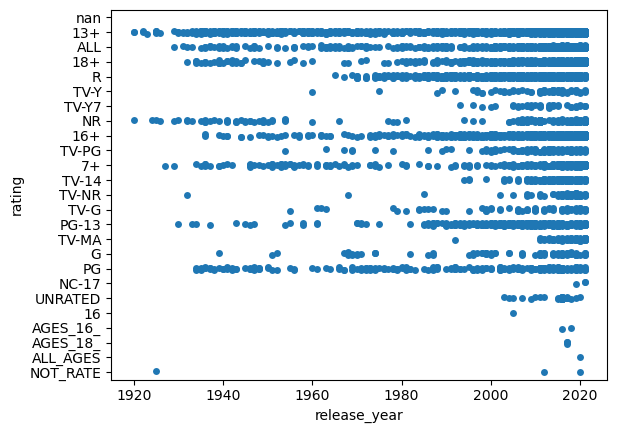

In [24]:
sns.stripplot(x="release_year",y='rating',data = df)

# END.
